<a href="https://colab.research.google.com/github/Karthikard/ML/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary_prediction.xlsx to salary_prediction.xlsx


In [3]:
df=pd.read_excel('salary_prediction.xlsx')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


Data Preprocessing

In [6]:
!pip install word2number

from word2number import w2n

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=1f9634160244f9da4a497f92d6a49ad25bc9bacf165f8c8b83faa28c2333fe77
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [17]:
df['experience']=df['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x,str) else x)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [20]:
median_test_score=df['test_score(out of 10)'].median()
median_test_score

8.0

In [21]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [24]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [25]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [26]:
reg.intercept_

np.float64(17737.263464337688)

In [27]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

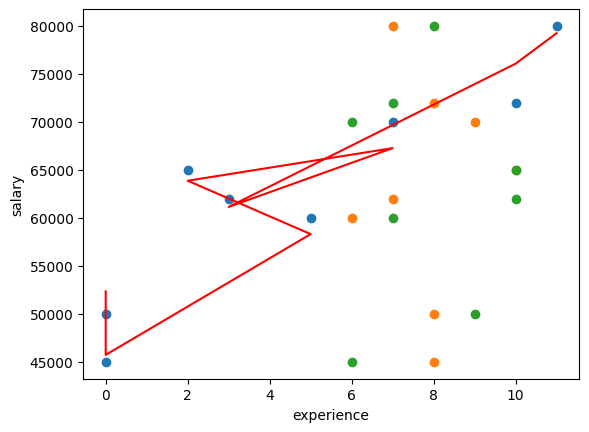

In [35]:
plt.scatter(df['experience'],df['salary($)'])
plt.scatter(df['test_score(out of 10)'],df['salary($)'])
plt.scatter(df['interview_score(out of 10)'],df['salary($)'])
plt.xlabel('experience')
plt.ylabel('salary')

plt.plot(df['experience'],reg.predict(df[['experience','test_score(out of 10)','interview_score(out of 10)']]),color='red')